# Dataset sobre Previsão de derrames

Nessa faremos uma pequena análise exploratória dos dados para entrarmos com machine learning e tentarmos prever a incidência de derramos em determinadas caracteristicas de seres humanos.

#### Importando as bibliotecas

In [ ]:
#Manipulação
import numpy as np
import pandas as pd

#Tratamento
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


#Métricas
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings(action='ignore')

Lendo o arquivo que contém os dados.
Estamos usando o dataset https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.

In [561]:
data = pd.read_csv(r'C:\Users\Usuario\Desktop\data\derrame.csv')

In [562]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


O dataset contém 5 colunas de variáveis categóricas, antes de transformar em variáveis numéricas, vamos gerar alguns gráficos para entendermos melhor os dados.

In [673]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [674]:
a = df[df['gender']=='Male']

In [675]:
a[a['stroke']==1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.893237,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
240,10548,Male,66.0,0,0,Yes,Private,Rural,76.46,21.200000,formerly smoked,1
241,52282,Male,57.0,0,0,Yes,Private,Rural,197.28,34.500000,formerly smoked,1
242,45535,Male,68.0,0,0,Yes,Private,Rural,233.94,42.400000,never smoked,1
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1


<AxesSubplot:xlabel='gender', ylabel='count'>

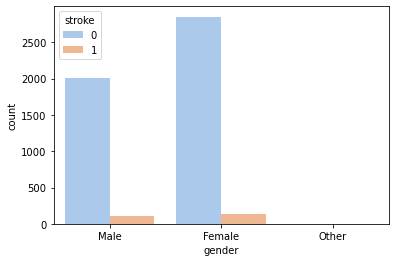

In [659]:
sns.countplot(data=df,x='gender',hue='stroke',palette="pastel")

Nesse gráfico de contagem podemos ver a incidência de derrame entre os gêneros é bem parelha, mesmo com gênero feminino possuindo mais amostras.

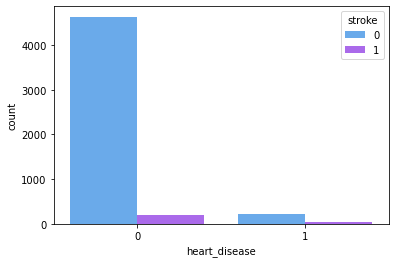

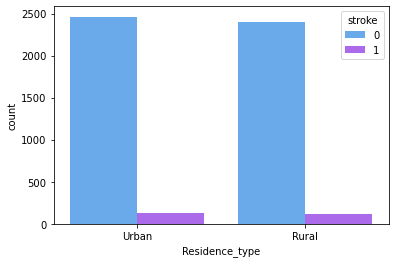

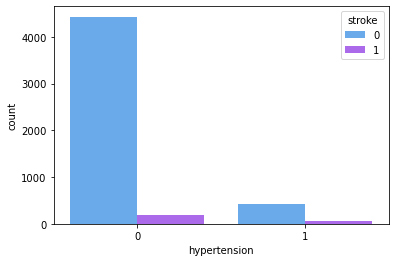

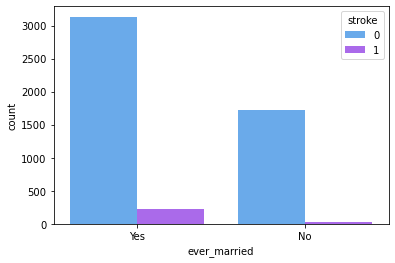

In [680]:
cols = ['heart_disease','Residence_type','hypertension','ever_married']

for col in cols:
    sns.countplot(data=data, x=col, palette='cool',hue='stroke')
    plt.show()

Nesses gráficos nós não conseguimos identificar nenhuma característica forte que indique uma relevância na incidência do derrame

Agora vamos gerar um gráfico de calor para observar a correlação entre as variáveis

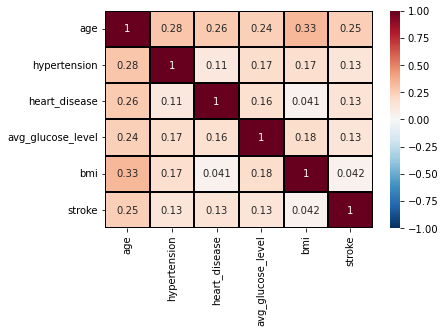

In [681]:
cols1 = [x for x in df.columns if x != 'id']
var_num_corr = data[cols1].corr()

sns.heatmap(var_num_corr, vmin=-1, vmax=1, annot=True, linewidth=0.01, linecolor='black', cmap='RdBu_r')

plt.show()

Com esse gráfico conseguimos identificar melhor as características com maior correlação. a feature idade tem correlação de 0.25 com a incidência de derrame.

In [612]:
def check_outliers(df, variable):
    
    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Dados estatísticos

In [618]:
import scipy.stats as stats

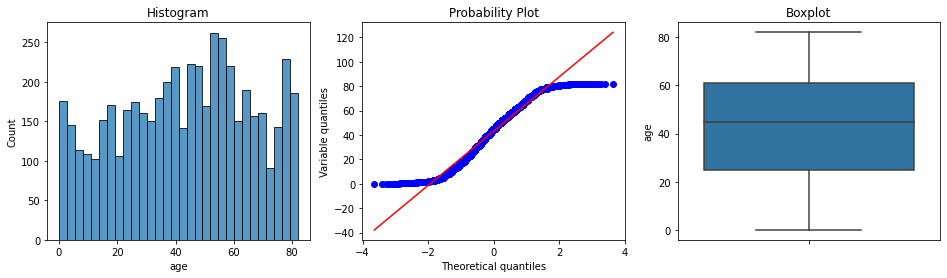

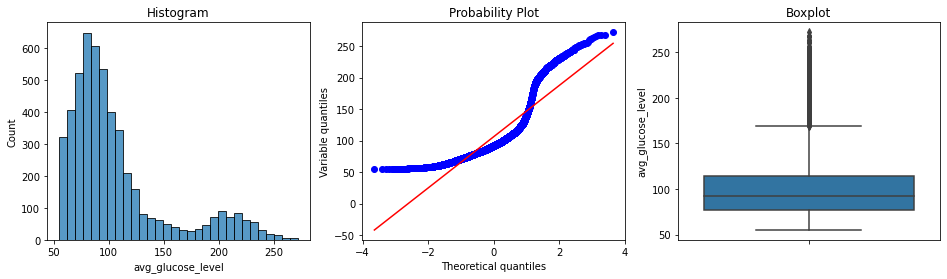

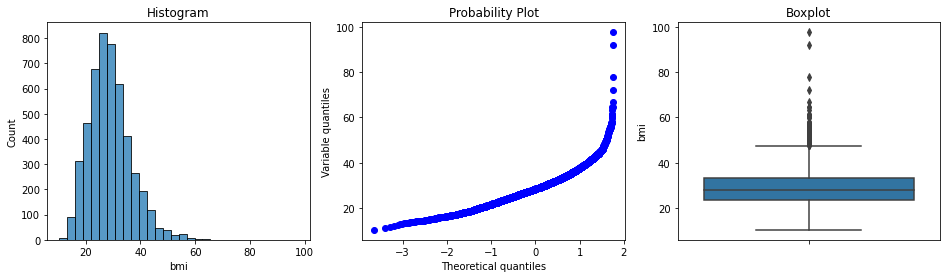

In [623]:
for feature in ['age','avg_glucose_level','bmi']:
    check_outliers(data, feature)

Aqui podemos ver a distruibuição dos dados, probabilidade esperada e os quartis.

# Preprocessing

In [564]:
def label_encoder(df, column):
    df = df.copy()
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return df

In [565]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Excluindo a coluna id
    df = df.drop('id', axis=1)
    df.drop(3116,inplace=True)
    
    # Dados binários
    df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
    df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})
    
    # Label encoder
    for column in ['gender', 'work_type', 'smoking_status']:
        df = label_encoder(df, column=column)
    
    # X Y
    y = df['stroke']
    X = df.drop('stroke', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    
    # Dados faltantes
    imputer = KNNImputer()
    imputer.fit(X_train)
    X_train = pd.DataFrame(imputer.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    # Normalização dos dados
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [566]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [567]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4313,1.174021,0.608843,-0.330374,-0.238161,0.719002,-0.152818,0.994146,0.638258,0.008000,-1.280668
376,-0.851774,-1.886989,-0.330374,-0.238161,-1.390817,1.684598,-1.005888,-0.386663,-1.755075,-1.280668
4913,1.174021,-1.036663,-0.330374,-0.238161,-1.390817,-0.152818,0.994146,-0.466196,-1.106886,0.587201
1791,1.174021,-1.347974,-0.330374,-0.238161,-1.390817,1.684598,-1.005888,0.697358,-1.405053,-1.280668
2166,1.174021,-0.680878,-0.330374,-0.238161,0.719002,-0.152818,-1.005888,1.401291,-0.238312,-1.280668
...,...,...,...,...,...,...,...,...,...,...
2895,1.174021,0.119639,-0.330374,-0.238161,0.719002,-0.152818,0.994146,0.704389,0.033928,0.587201
2763,-0.851774,0.075165,-0.330374,-0.238161,0.719002,-0.152818,-1.005888,-0.922303,0.383950,-1.280668
905,-0.851774,-0.547458,-0.330374,-0.238161,0.719002,-0.152818,-1.005888,-0.647013,0.850646,0.587201
3980,-0.851774,0.075165,-0.330374,-0.238161,0.719002,-0.152818,-1.005888,2.469274,3.365621,1.521136


# Treino

In [568]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

Como temos um dataset desbalanceado, vamo aplicar um método de oversampling. Utilizaremos o SMOTE

In [686]:
def balanceamento(X_train,y_train):
    smt = SMOTE()
    X_train_oversampled, y_train_oversampled = smt.fit_resample(X_train, y_train)
    return X_train_oversampled,y_train_oversampled
    

In [687]:
X_train_oversampled, y_train_oversampled = balanceamento(X_train, y_train)
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss')
}

for name, model in models.items():
    model.fit(X_train_oversampled, y_train_oversampled)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


In [688]:
y_train_oversampled.value_counts()

0    3411
1    3411
Name: stroke, dtype: int64

In [689]:
print("Model Performance\n-----------------")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(
        "\n" + name + " Accuracy: {:.3f}%\n\t\t\t\t       F1-Score: {:.5f}"\
        .format(accuracy_score(y_test, y_pred) * 100, f1_score(y_test, y_pred))
    )
    print(classification_report(y_test,y_pred))

Model Performance
-----------------

                   Logistic Regression Accuracy: 75.016%
				       F1-Score: 0.25919
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1450
           1       0.15      0.81      0.26        83

    accuracy                           0.75      1533
   macro avg       0.57      0.78      0.55      1533
weighted avg       0.94      0.75      0.82      1533


                   K-Nearest Neighbors Accuracy: 81.866%
				       F1-Score: 0.15244
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1450
           1       0.10      0.30      0.15        83

    accuracy                           0.82      1533
   macro avg       0.53      0.57      0.53      1533
weighted avg       0.91      0.82      0.86      1533


                         Decision Tree Accuracy: 87.606%
				       F1-Score: 0.15929
              precision    recall  f1-score   sup

# Conclusão

O modelo de Regressão logística gerou o melhor recall, isso significa que de todos os derrames que realmente são positivos, qual percentual é identificado corretamente pelo modelo? 81%